# Statistical Modeling 

Statistical modeling is a mathematical approach used to represent and analyze the relationships between variables in data. It involves constructing a model that captures the underlying patterns and structures within a dataset, often with the goal of making predictions or understanding the data better.


    Independent variables are also known as: predictor variables, input variables, explanatory variables, features
    
    Dependent variables are also known as: outcome variables, target variables, response variables


## Model Loss

A loss function evaluates how well your model represents the relationship between data variables.



## Simple Linear Regression

The model notation is 

$$y=mx+c$$

or, alternatively

$$y = \beta_0+ \beta_1 x $$

## Calculating M

### The Least-Squares Method

We can calculate $\hat{m}$ (the slope of the best-fit line) using this formula:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

Breaking down those components, we have:

* $\hat{m}$: the estimated slope
* $\rho$: the Pearson correlation, represented by the Greek letter "Rho"
* $S_y$: the standard deviation of the y values
* $S_x$: the standard deviation of the x values

## Calculating C

Then once we have the slope value ($\hat{m}$), we can put it back into our formula $(\hat{y} = \hat{m} x + \hat{c})$ to calculate the intercept. The idea is that

$$\bar{y} = \hat{c} + \hat{m} \bar{x}$$

so

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Breaking down those components, we have:

* $\hat{c}$: the estimated intercept
* $\bar{y}$: the mean of the y values
* $\hat{m}$: the estimated slope
* $\bar{x}$: the mean of the x values

In [12]:
# imports 

import numpy as np 
import seaborn as sns

In [13]:

# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

Write a function `calc_slope` that returns $\hat{m}$ for a given set of x and y data.

The formula is:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

In [14]:
std_x = X.std()
std_x

2.9393876913398134

In [15]:
std_y = np.std(Y)
std_y

1.624807680927192

In [21]:
def slope(X,Y):
    # corr_coef
    p_corr =  np.corrcoef(X,Y)
    # std y
    std_y = np.std(Y)
    #std X
    std_x = X.std()
    #m
    m = p_corr*(std_y/std_x)
    return m
slope_v = slope(X,Y)
slope_v

array([[0.5527708 , 0.53935185],
       [0.53935185, 0.5527708 ]])

In [17]:
# calculate the slope 
p_corr = np.corrcoef(X,Y)
p_corr


array([[1.        , 0.97572421],
       [0.97572421, 1.        ]])

<AxesSubplot:>

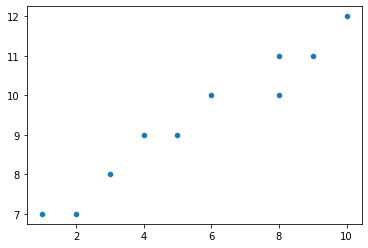

In [18]:
sns.scatterplot(x = X ,y = Y)

<AxesSubplot:>

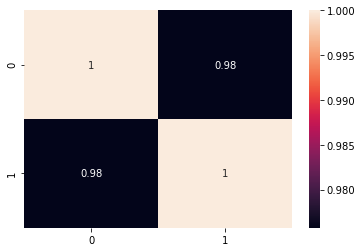

In [19]:
sns.heatmap(p_corr,annot = True)

## Calculating the Intercept

Now that we have our estimated slope $\hat{m}$, we can calculate the estimated intercept $\hat{c}$.

As a reminder, the calculation for the best-fit line's y-intercept is:

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Write a function `calc_intercept` that returns $\hat{c}$ for a given $\hat{m}$, x, and y.


In [22]:
X_mean = np.mean()
X_mean

TypeError: _mean_dispatcher() missing 1 required positional argument: 'a'

In [ ]:
# calculate the intecept

c = Y_mean - (X_mean*m)
c

NameError: name 'Y_mean' is not defined

## Predicting a datapoint 

In [23]:
def get_c(X,Y):
    #y mean
   Y_mean = Y.mean() 
   #x_mean
   X_mean = np.mean(X)
   
   m = slope(X,Y)
   
   c = Y_mean - (X_mean*m)
   
   return c

In [ ]:
# to predict a data point 

# Todo

In [25]:
# make a model for sales and any other column in the provided dataset
import pandas as  pd

df=pd.read_csv('./data/advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
